In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split # preprocessing
from imblearn.over_sampling import SMOTE  # preprocessing
from sklearn.preprocessing import RobustScaler

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

df.columns = new_cols

In [ ]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart-disease          0
ever-married           0
work-type              0
Residence-type         0
avg-glucose-level      0
bmi                  201
smoking-status         0
stroke                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart-disease        0
ever-married         0
work-type            0
Residence-type       0
avg-glucose-level    0
bmi                  0
smoking-status       0
stroke               0
dtype: int64

In [ ]:
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart-disease      4073 non-null   int64  
 4   ever-married       4073 non-null   object 
 5   work-type          4073 non-null   object 
 6   Residence-type     4073 non-null   object 
 7   avg-glucose-level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking-status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


In [ ]:
df = df[df['smoking-status'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3256 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3256 non-null   object 
 1   age                3256 non-null   float64
 2   hypertension       3256 non-null   int64  
 3   heart-disease      3256 non-null   int64  
 4   ever-married       3256 non-null   object 
 5   work-type          3256 non-null   object 
 6   Residence-type     3256 non-null   object 
 7   avg-glucose-level  3256 non-null   float64
 8   bmi                3256 non-null   float64
 9   smoking-status     3256 non-null   object 
 10  stroke             3256 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [ ]:
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


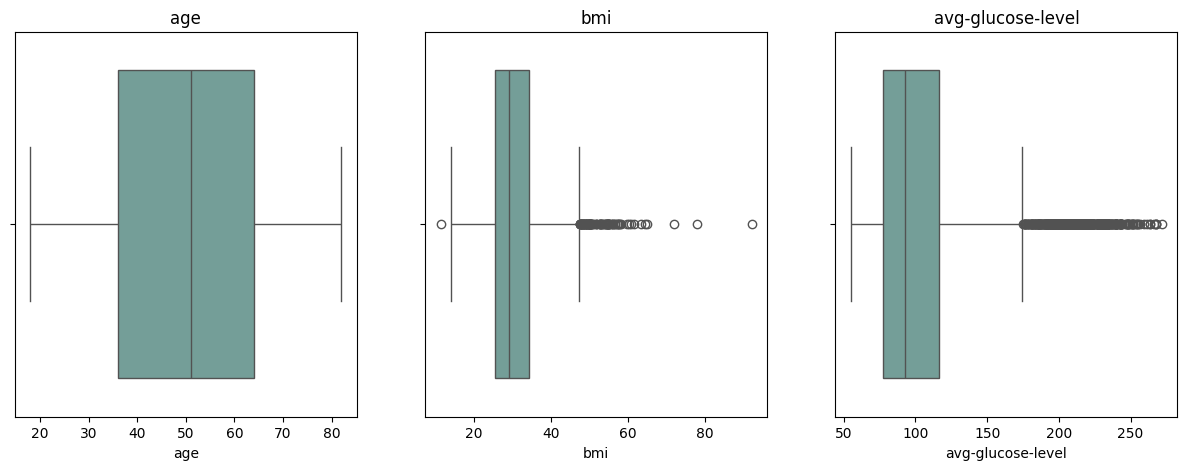

In [ ]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [ ]:
df = df[df['bmi'] < 90]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [ ]:
stroke_count =df['stroke'].value_counts() # pandas serie, it contains the number of '1' (stroke) and the number of '0' (no stroke)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 5.53%


In [ ]:
gender_count = df['gender'].value_counts()
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1260
Number of females:  1994


In [ ]:
hypertension_count =df['hypertension'].value_counts()
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 12.51%


In [ ]:
heart_disease_count =df['heart-disease'].value_counts()
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 6.33%


In [ ]:
ever_married_count =df['ever-married'].value_counts()
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 79.84%


In [ ]:
work_type_count =df['work-type'].value_counts()
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.03%
Self-employed percentage: 19.21%
Gov percentage: 15.67%
Never Worked fraction: 0.1%


In [ ]:
residence_type_count =df['Residence-type'].value_counts()
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))

Urban percentage: 51.14%
Rural pergentage: 48.86%


In [ ]:
smoking_status_count =df['smoking-status'].value_counts()
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.64%
Formely Smoked fraction: 24.98%
Smokes fraction: 22.37%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [ ]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
from sklearn.model_selection import train_test_split

features = np.array(df.columns[:-1])
print(features)
X = df.drop(['stroke'], axis = 1) # Set di caratteristiche
y = df['stroke'] # Target da prevedere

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [ ]:
y.value_counts()

stroke
0    3074
1     180
Name: count, dtype: int64

<Axes: ylabel='count'>

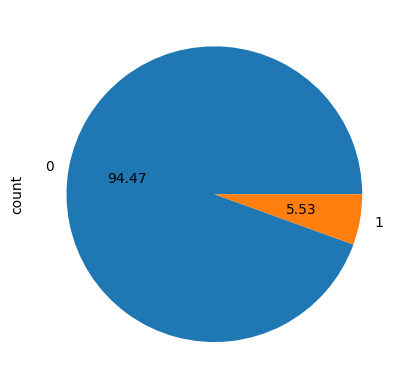

In [ ]:
y.value_counts().plot.pie(autopct = "%.2f")

In [ ]:
print(X)

      gender   age  hypertension  heart-disease ever-married      work-type  \
0       Male  67.0             0              1          Yes        Private   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5100    Male  82.0             1              0          Yes  Self-employed   
5102  Female  57.0             0              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   

     Residence-type  avg-glucose-level   bmi   smok

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train)

      gender   age  hypertension  heart-disease ever-married      work-type  \
1289  Female  80.0             0              0          Yes  Self-employed   
1154  Female  21.0             0              0           No        Private   
1577    Male  48.0             1              0          Yes  Self-employed   
1606    Male  51.0             0              0           No        Private   
2943  Female  27.0             0              0           No        Private   
...      ...   ...           ...            ...          ...            ...   
1153    Male  45.0             0              0          Yes       Govt_job   
2210  Female  37.0             0              0          Yes        Private   
969   Female  19.0             0              0           No        Private   
2087  Female  42.0             0              0          Yes  Self-employed   
606     Male  44.0             0              0          Yes        Private   

     Residence-type  avg-glucose-level   bmi   smok

In [ ]:
print(X_test)

      gender   age  hypertension  heart-disease ever-married      work-type  \
2726  Female  30.0             0              0           No        Private   
4689  Female  32.0             0              0          Yes        Private   
2283    Male  64.0             0              1          Yes        Private   
3308    Male  61.0             1              0          Yes        Private   
1969    Male  39.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
3399  Female  79.0             1              1          Yes       Govt_job   
4026  Female  64.0             0              0          Yes       Govt_job   
3412  Female  18.0             0              0           No        Private   
1571  Female  65.0             0              0          Yes  Self-employed   
2416  Female  47.0             0              0          Yes        Private   

     Residence-type  avg-glucose-level   bmi   smok

In [ ]:
gender = pd.get_dummies(X_train["gender"], prefix="gender")
married = pd.get_dummies(X_train["ever-married"], prefix="ever-married")
work = pd.get_dummies(X_train["work-type"], prefix="work-type")
residence = pd.get_dummies(X_train["Residence-type"], prefix="Residence-type")
smoking = pd.get_dummies(X_train["smoking-status"], prefix="smoking-status")

# the features that are one hot encoded
one_hot_features = ["gender", "ever-married", "work-type", "Residence-type", "smoking-status"]
X_train.drop(columns=one_hot_features, inplace=True)


X_tmp_0 = pd.concat([gender, married, work, residence, smoking], axis=1)
dummies_columns = X_tmp_0.columns

X_train = pd.concat([X_train, X_tmp_0], axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

features_to_encode = ["gender_Female", "gender_Male", "ever-married_No", "ever-married_Yes", "work-type_Govt_job", "work-type_Never_worked", "work-type_Private", "work-type_Self-employed","Residence-type_Rural", "Residence-type_Urban","smoking-status_formerly smoked", "smoking-status_never smoked", "smoking-status_smokes"]

encoder = OrdinalEncoder()

X_train[features_to_encode] = encoder.fit_transform(X_train[features_to_encode])

In [ ]:
print(X_train)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
1289  80.0             0              0              72.61  27.6   
1154  21.0             0              0             112.07  28.2   
1577  48.0             1              0              79.20  32.5   
1606  51.0             0              0             106.41  41.9   
2943  27.0             0              0              80.22  21.6   
...    ...           ...            ...                ...   ...   
1153  45.0             0              0              86.99  37.9   
2210  37.0             0              0              60.61  35.7   
969   19.0             0              0              72.84  22.7   
2087  42.0             0              0              98.76  26.4   
606   44.0             0              0              83.51  31.2   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
1289            1.0          0.0              0.0               1.0   
1154            1.0          0.0         

In [ ]:
tmp_features = X_train.columns
print(tmp_features)

Index(['age', 'hypertension', 'heart-disease', 'avg-glucose-level', 'bmi',
       'gender_Female', 'gender_Male', 'ever-married_No', 'ever-married_Yes',
       'work-type_Govt_job', 'work-type_Never_worked', 'work-type_Private',
       'work-type_Self-employed', 'Residence-type_Rural',
       'Residence-type_Urban', 'smoking-status_formerly smoked',
       'smoking-status_never smoked', 'smoking-status_smokes'],
      dtype='object')


In [ ]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# convert to dataframe
X_smote = pd.DataFrame(X_smote, columns=tmp_features)
print(X_smote)

            age  hypertension  heart-disease  avg-glucose-level        bmi  \
0     80.000000             0              0          72.610000  27.600000   
1     21.000000             0              0         112.070000  28.200000   
2     48.000000             1              0          79.200000  32.500000   
3     51.000000             0              0         106.410000  41.900000   
4     27.000000             0              0          80.220000  21.600000   
...         ...           ...            ...                ...        ...   
4923  61.026983             0              1         120.409136  36.768969   
4924  79.497416             0              0          72.125639  27.753359   
4925  55.263487             0              0         208.671527  39.275412   
4926  72.386538             1              0         187.287399  36.868077   
4927  49.859353             0              0          72.925710  30.274684   

      gender_Female  gender_Male  ever-married_No  ever-married

In [ ]:
X_smote = np.round(X_smote)
X_smote[features_to_encode] = encoder.inverse_transform(X_smote[features_to_encode])
print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
0     80.0             0              0               73.0  28.0   
1     21.0             0              0              112.0  28.0   
2     48.0             1              0               79.0  32.0   
3     51.0             0              0              106.0  42.0   
4     27.0             0              0               80.0  22.0   
...    ...           ...            ...                ...   ...   
4923  61.0             0              1              120.0  37.0   
4924  79.0             0              0               72.0  28.0   
4925  55.0             0              0              209.0  39.0   
4926  72.0             1              0              187.0  37.0   
4927  50.0             0              0               73.0  30.0   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
0              True        False            False              True   
1              True        False         

In [ ]:
dummies = pd.from_dummies(X_smote[dummies_columns], sep='_')
print(dummies)

      gender ever-married      work-type Residence-type   smoking-status
0     Female          Yes  Self-employed          Rural     never smoked
1     Female           No        Private          Urban     never smoked
2       Male          Yes  Self-employed          Urban     never smoked
3       Male           No        Private          Rural           smokes
4     Female           No        Private          Rural     never smoked
...      ...          ...            ...            ...              ...
4923  Female          Yes       Govt_job          Rural           smokes
4924    Male          Yes        Private          Rural     never smoked
4925  Female          Yes        Private          Urban           smokes
4926    Male          Yes  Self-employed          Rural     never smoked
4927  Female          Yes        Private          Rural  formerly smoked

[4928 rows x 5 columns]


In [ ]:
print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
0     80.0             0              0               73.0  28.0   
1     21.0             0              0              112.0  28.0   
2     48.0             1              0               79.0  32.0   
3     51.0             0              0              106.0  42.0   
4     27.0             0              0               80.0  22.0   
...    ...           ...            ...                ...   ...   
4923  61.0             0              1              120.0  37.0   
4924  79.0             0              0               72.0  28.0   
4925  55.0             0              0              209.0  39.0   
4926  72.0             1              0              187.0  37.0   
4927  50.0             0              0               73.0  30.0   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
0              True        False            False              True   
1              True        False         

In [ ]:
X_smote.drop(columns=dummies_columns, inplace=True)
X_smote = pd.concat([X_smote, dummies], axis=1)

print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     80.0             0              0               73.0  28.0  Female   
1     21.0             0              0              112.0  28.0  Female   
2     48.0             1              0               79.0  32.0    Male   
3     51.0             0              0              106.0  42.0    Male   
4     27.0             0              0               80.0  22.0  Female   
...    ...           ...            ...                ...   ...     ...   
4923  61.0             0              1              120.0  37.0  Female   
4924  79.0             0              0               72.0  28.0    Male   
4925  55.0             0              0              209.0  39.0  Female   
4926  72.0             1              0              187.0  37.0    Male   
4927  50.0             0              0               73.0  30.0  Female   

     ever-married      work-type Residence-type   smoking-status  
0             Yes  S

In [ ]:
X_train = X_smote
y_train = y_smote

In [ ]:
df_balanced = pd.DataFrame(X_train, columns=features)
df_balanced['stroke'] = y_train

In [ ]:
df_balanced.shape

(4928, 11)

<Axes: xlabel='stroke', ylabel='count'>

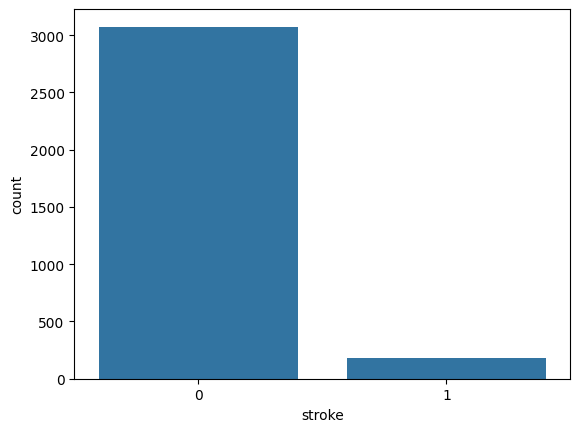

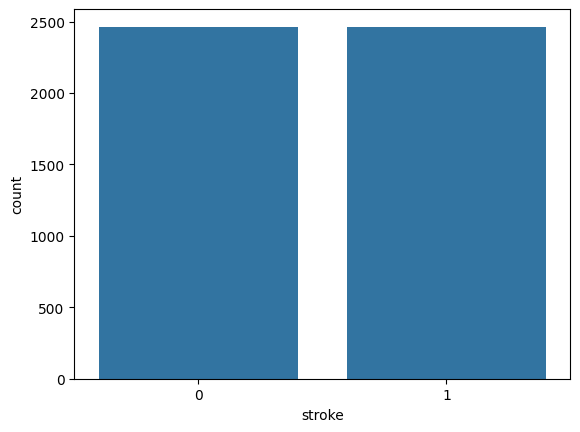

In [ ]:
sns.countplot(x='stroke', data=df)
plt.figure()
sns.countplot(x='stroke', data=df_balanced)

<Axes: xlabel='age_bucket', ylabel='percent'>

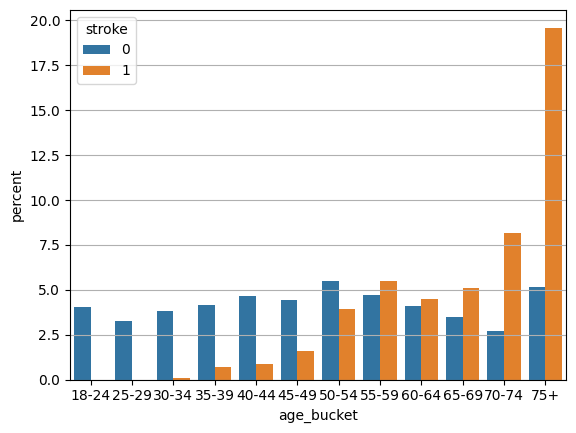

In [ ]:
plt.grid()
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
dataset_bal_copy = df_balanced.copy()
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

<Axes: xlabel='hypertension', ylabel='percent'>

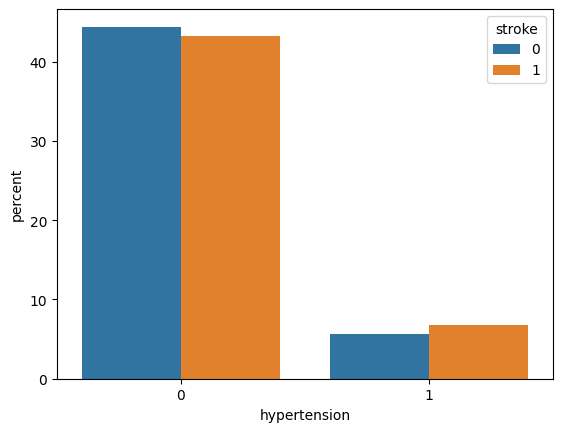

In [ ]:
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='heart-disease', ylabel='percent'>

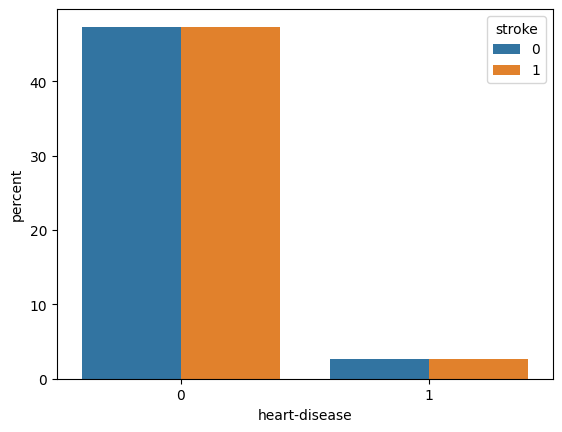

In [ ]:
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='smoking-status', ylabel='percent'>

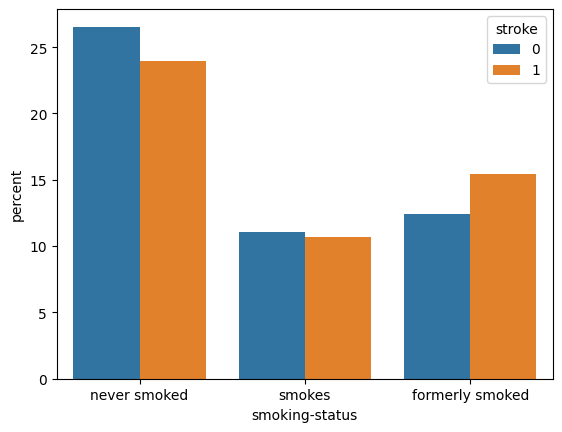

In [ ]:
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='bmi_bucket', ylabel='percent'>

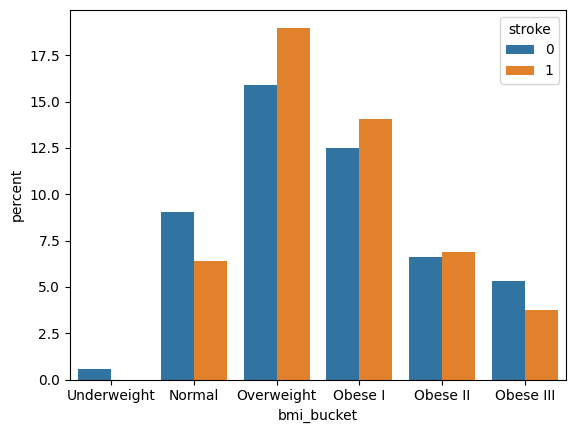

In [ ]:
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

<Axes: xlabel='Residence-type', ylabel='percent'>

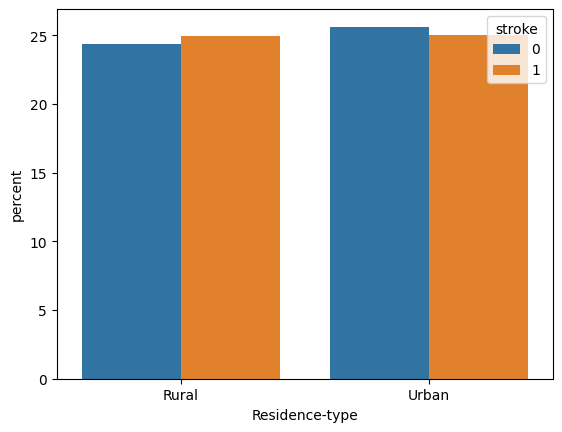

In [ ]:
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='work-type', ylabel='percent'>

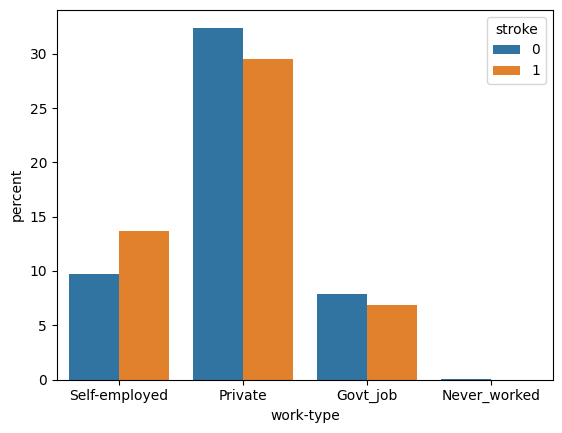

In [ ]:
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='gender', ylabel='percent'>

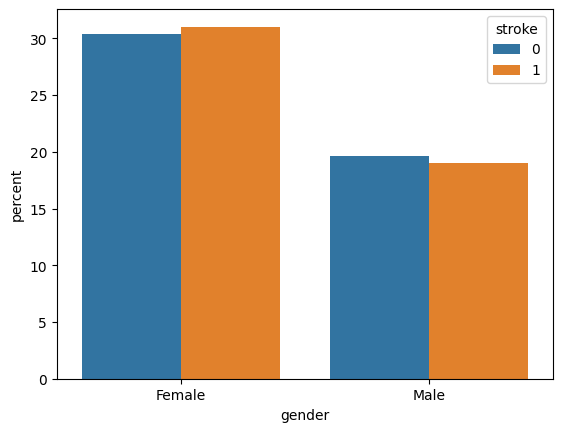

In [ ]:
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Combinazione di X e y in un nuovo DataFrame
df_copy = pd.concat([X_train, y_train], axis=1)

print("Nuovo dataset combinato (X + y):")
print(df_copy)

Nuovo dataset combinato (X + y):
       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     80.0             0              0               73.0  28.0  Female   
1     21.0             0              0              112.0  28.0  Female   
2     48.0             1              0               79.0  32.0    Male   
3     51.0             0              0              106.0  42.0    Male   
4     27.0             0              0               80.0  22.0  Female   
...    ...           ...            ...                ...   ...     ...   
4923  61.0             0              1              120.0  37.0  Female   
4924  79.0             0              0               72.0  28.0    Male   
4925  55.0             0              0              209.0  39.0  Female   
4926  72.0             1              0              187.0  37.0    Male   
4927  50.0             0              0               73.0  30.0  Female   

     ever-married      work-type Residence-type   smok

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Separare le caratteristiche (X) e la variabile target (y)
X_train_copy = df_copy.drop('stroke', axis=1)
y_train_copy = df_copy['stroke']

# Esegui il Label Encoding per le caratteristiche categoriali
label_encoders = {}
for column in X_train_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_copy[column] = le.fit_transform(X_train_copy[column])
    label_encoders[column] = le

In [ ]:
print(X_train_copy)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     80.0             0              0               73.0  28.0       0   
1     21.0             0              0              112.0  28.0       0   
2     48.0             1              0               79.0  32.0       1   
3     51.0             0              0              106.0  42.0       1   
4     27.0             0              0               80.0  22.0       0   
...    ...           ...            ...                ...   ...     ...   
4923  61.0             0              1              120.0  37.0       0   
4924  79.0             0              0               72.0  28.0       1   
4925  55.0             0              0              209.0  39.0       0   
4926  72.0             1              0              187.0  37.0       1   
4927  50.0             0              0               73.0  30.0       0   

      ever-married  work-type  Residence-type  smoking-status  
0                1     

In [ ]:
print(X_train)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     80.0             0              0               73.0  28.0  Female   
1     21.0             0              0              112.0  28.0  Female   
2     48.0             1              0               79.0  32.0    Male   
3     51.0             0              0              106.0  42.0    Male   
4     27.0             0              0               80.0  22.0  Female   
...    ...           ...            ...                ...   ...     ...   
4923  61.0             0              1              120.0  37.0  Female   
4924  79.0             0              0               72.0  28.0    Male   
4925  55.0             0              0              209.0  39.0  Female   
4926  72.0             1              0              187.0  37.0    Male   
4927  50.0             0              0               73.0  30.0  Female   

     ever-married      work-type Residence-type   smoking-status  
0             Yes  S

             Feature  Importance
0                age    0.395217
3  avg-glucose-level    0.245796
4                bmi    0.145997
9     smoking-status    0.051436
7          work-type    0.048681
8     Residence-type    0.035407
5             gender    0.030878
6       ever-married    0.019109
2      heart-disease    0.014589
1       hypertension    0.012890


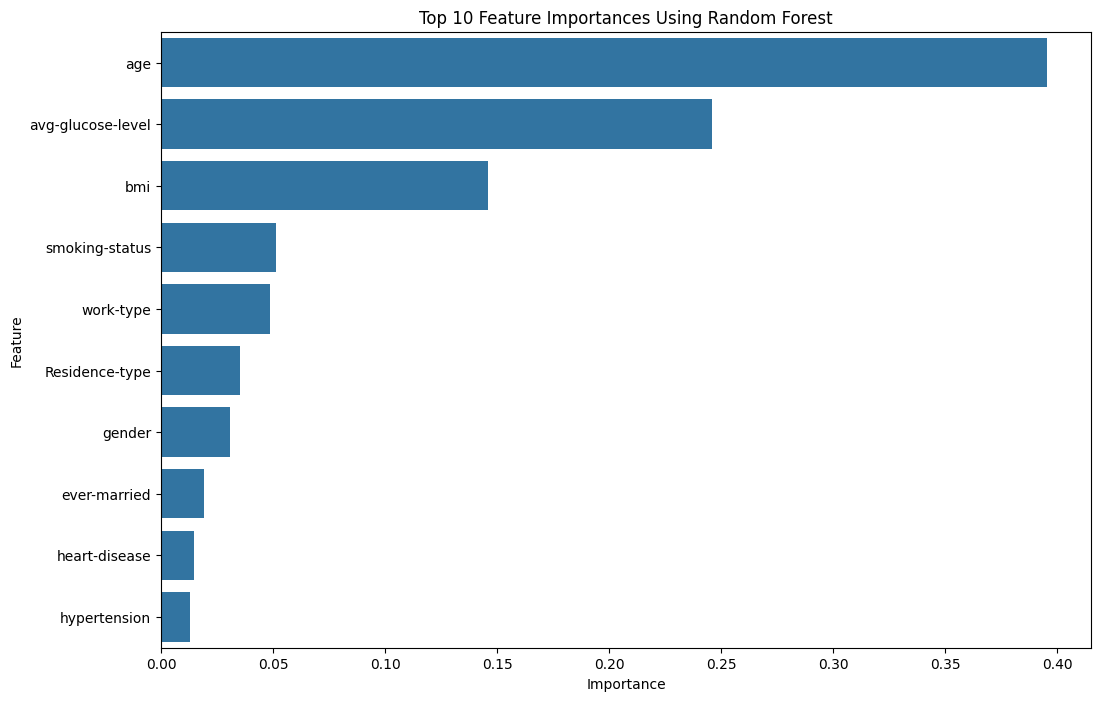

In [ ]:
# Creare e allenare il modello di Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_copy, y_train_copy)

# Ottenere l'importanza delle caratteristiche
feature_importances = rf.feature_importances_

# Creare un DataFrame per visualizzare le importanze
feature_importances_df = pd.DataFrame({
    'Feature': X_train_copy.columns,
    'Importance': feature_importances
})

# Ordinare le caratteristiche per importanza decrescente
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualizzare le prime 10 caratteristiche più importanti
print(feature_importances_df.head(10))

# visualizzare l'importanza delle caratteristiche con un grafico
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Feature Importances Using Random Forest')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Creare e allenare il modello di Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_copy, y_train_copy)

# Ottenere l'importanza delle caratteristiche (Information Gain)
feature_importances = dt.feature_importances_

# Creare un DataFrame per visualizzare le importanze
feature_importances_df = pd.DataFrame({
    'Feature': X_train_copy.columns,
    'Information Gain': feature_importances
})

# Ordinare le caratteristiche per importanza decrescente
feature_importances_df = feature_importances_df.sort_values(by='Information Gain', ascending=False)

# Visualizzare le caratteristiche ordinate per Information Gain
print("Importanza delle caratteristiche (Information Gain):")
print(feature_importances_df)

Importanza delle caratteristiche (Information Gain):
             Feature  Information Gain
0                age          0.362130
3  avg-glucose-level          0.249680
4                bmi          0.149155
9     smoking-status          0.060894
7          work-type          0.059437
5             gender          0.038235
8     Residence-type          0.037332
6       ever-married          0.017778
1       hypertension          0.015930
2      heart-disease          0.009428


In [ ]:
# Combinazione di X e y in un nuovo DataFrame
df_test_copy = pd.concat([X_test, y_test], axis=1)

print("Nuovo dataset combinato (X + y):")
print(df_copy)

Nuovo dataset combinato (X + y):
       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     80.0             0              0               73.0  28.0  Female   
1     21.0             0              0              112.0  28.0  Female   
2     48.0             1              0               79.0  32.0    Male   
3     51.0             0              0              106.0  42.0    Male   
4     27.0             0              0               80.0  22.0  Female   
...    ...           ...            ...                ...   ...     ...   
4923  61.0             0              1              120.0  37.0  Female   
4924  79.0             0              0               72.0  28.0    Male   
4925  55.0             0              0              209.0  39.0  Female   
4926  72.0             1              0              187.0  37.0    Male   
4927  50.0             0              0               73.0  30.0  Female   

     ever-married      work-type Residence-type   smok

In [ ]:
# Separare le caratteristiche (X) e la variabile target (y)
X_test_copy = df_test_copy.drop('stroke', axis=1)
y_test_copy = df_test_copy['stroke']

# Esegui il Label Encoding per le caratteristiche categoriali
label_encoders = {}
for column in X_test_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_test_copy[column] = le.fit_transform(X_test_copy[column])
    label_encoders[column] = le

In [ ]:
print(len(y_test))
print(len(y_test_copy))

651
651


In [ ]:
print(X_train_copy)
print(X_test_copy)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     80.0             0              0               73.0  28.0       0   
1     21.0             0              0              112.0  28.0       0   
2     48.0             1              0               79.0  32.0       1   
3     51.0             0              0              106.0  42.0       1   
4     27.0             0              0               80.0  22.0       0   
...    ...           ...            ...                ...   ...     ...   
4923  61.0             0              1              120.0  37.0       0   
4924  79.0             0              0               72.0  28.0       1   
4925  55.0             0              0              209.0  39.0       0   
4926  72.0             1              0              187.0  37.0       1   
4927  50.0             0              0               73.0  30.0       0   

      ever-married  work-type  Residence-type  smoking-status  
0                1     

In [ ]:
# Cambiare l'ordine delle caratteristiche in X_test_copy per corrispondere a X_train_copy
X_test_copy = X_test_copy[X_train_copy.columns]
print(len(X_train_copy))
print(len(X_test_copy))

4928
651


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
nb = GaussianNB()
nb.fit(X_train_copy, y_train_copy);
# Fare previsioni sul test set
y_pred = nb.predict(X_test_copy)

#print(y_pred)
# Creare un DataFrame per confrontare le previsioni con i valori reali
comparison_df = pd.DataFrame({
    'Real': y_test,
    'Previsione': y_pred
})

print("Confronto tra valori reali e previsioni:")
print(comparison_df)

Confronto tra valori reali e previsioni:
      Real  Previsione
2726     0           0
4689     0           0
2283     0           1
3308     0           1
1969     0           0
...    ...         ...
3399     0           1
4026     0           1
3412     0           0
1571     0           1
2416     0           0

[651 rows x 2 columns]
